In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

In [167]:
file = "amb_other/sweep_fx_4to69Hz_1seg_0RPM.txt"
file = "amb_other/white_noise_fx_0RPM.txt"
df = pd.read_csv(file, sep="\t", header=None)

file_break_indexes = list(df[df[0]=="waveform"].index) + [df.index.max()]

files = []
for i in range(len(file_break_indexes) - 1):
    file = df.loc[file_break_indexes[i]:file_break_indexes[i+1]]
    file.columns = file.iloc[0]
    file = file.drop(file.index[0])
    file = file.iloc[:-1].dropna(how="all")
    files.append(file)
    
    
dfs = []
for df in files:    
    df = df.iloc[3:]
    old_cols = ["waveform", "Pos_Ax [um]", "Pos_Ay [um]", "Pos_Bx [um]", "Pos_By [um]", "F_Ax [N]",
                "F_Ay [N]", "F_Bx [N]", "F_By [N]", "Ex_Ax", "Ex_Ay", 'Ex_Bx', "Ex_By"]
    new_cols = ["datetime", "ax", "ay", "bx", "by", "f_ax", "f_ay", "f_bx", "f_by", "e_ax", "e_ay", "e_bx", "e_by"]
    df = df[old_cols]
    df.rename(columns = dict(zip(old_cols, new_cols)), inplace=True)
    df["datetime"] = df["datetime"].apply(pd.to_datetime)

    def to_float(x):
        if not isinstance(x, str):
            return x
        return float(x.replace(",", "."))

    for col in [ "ax", "ay", "bx", "by", "f_ax", "f_ay", "f_bx", "f_by", "e_ax", "e_ay", "e_bx", "e_by"]:
        df[col] = df[col].apply(to_float)

    df = df.drop(df[pd.isnull(df["datetime"])].index)
    #df["dt"] = (df["datetime"] - df["datetime"].shift()).apply(lambda x: x.delta)
    dfs.append(df)

    
def add_derivatives(df):
    #dt = (df["datetime"] - df["datetime"].shift()).median()
    for col in ["ax", "ay", "bx", "by"]:
        df = append_derivatives_to_dataframe(df, col, dt=0.000195, window_length=31, polyorder=3)
    return df


dfs = list(map(add_derivatives, dfs))

In [172]:
len(dfs)

1

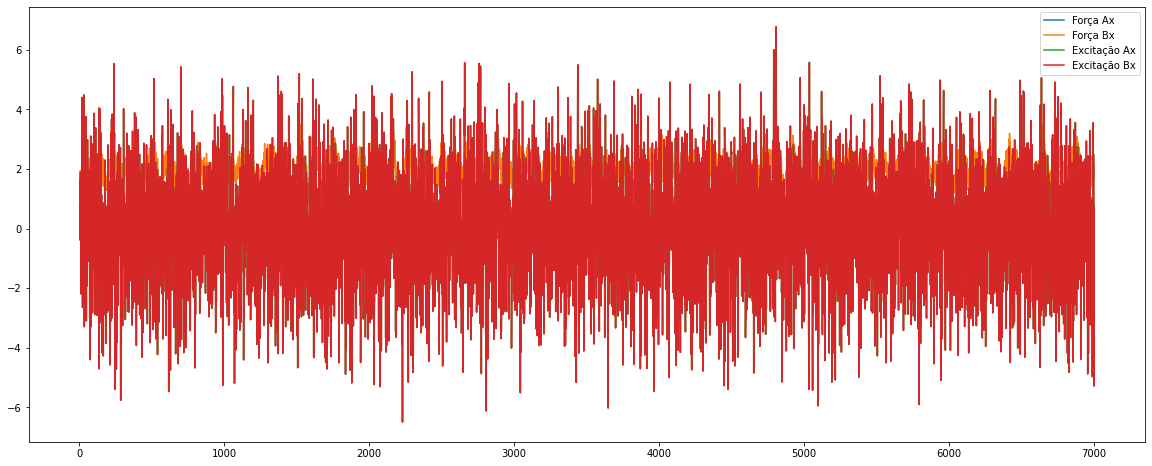

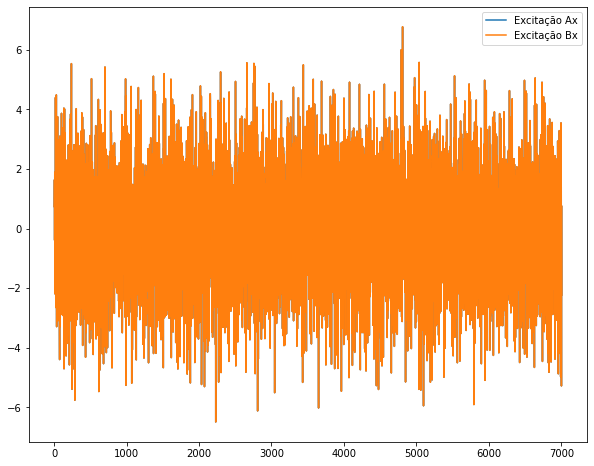

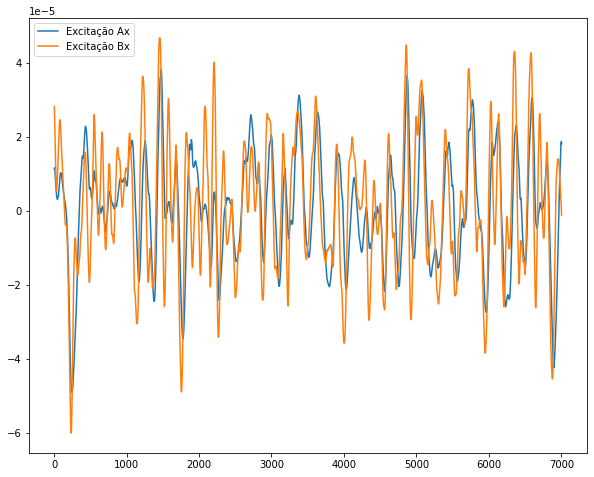

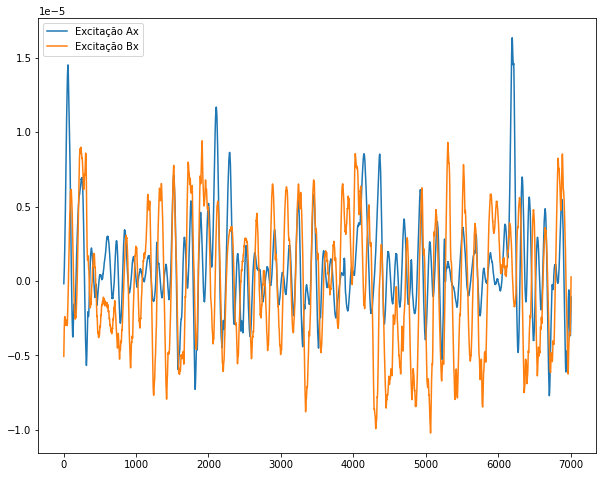

In [168]:
df = dfs[0]
i0 = 0
i1 = 7000
plt.figure(figsize=(20,8))
plt.plot(df["f_ax"].iloc[i0:i1], label="Força Ax")
plt.plot(df["f_bx"].iloc[i0:i1], label="Força Bx")
plt.plot(df["e_ax"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["e_bx"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["e_ax"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["e_bx"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["ax"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["bx"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["ay"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["by"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

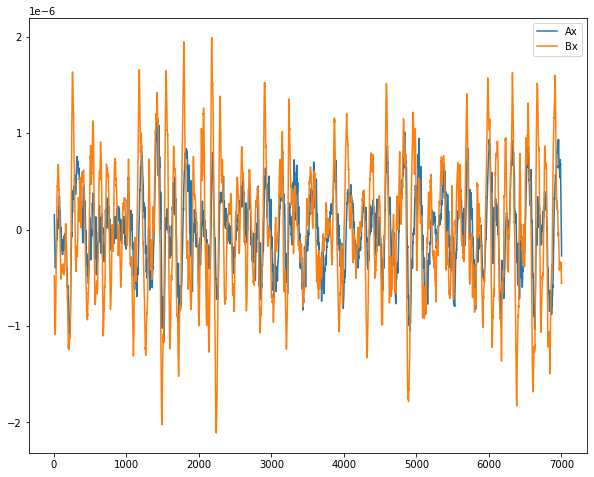

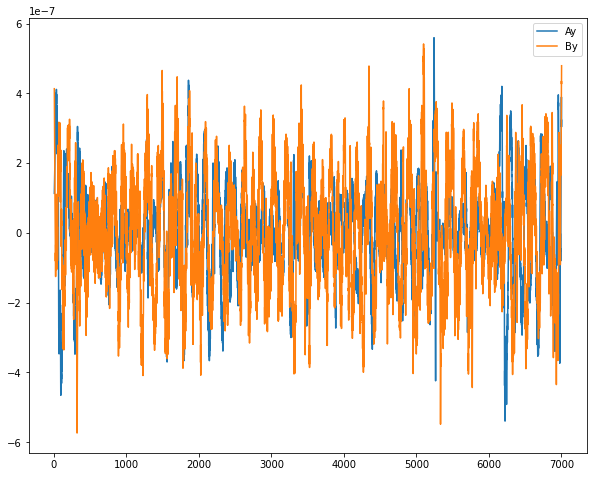

In [170]:
plt.figure(figsize=(10,8))
plt.plot((df["ax"] - df["ax"].shift()).iloc[i0:i1], label="Ax")
plt.plot((df["bx"] - df["bx"].shift()).iloc[i0:i1], label="Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot((df["ay"] - df["ay"].shift()).iloc[i0:i1], label="Ay")
plt.plot((df["by"] - df["by"].shift()).iloc[i0:i1], label="By")
plt.legend()
plt.show()

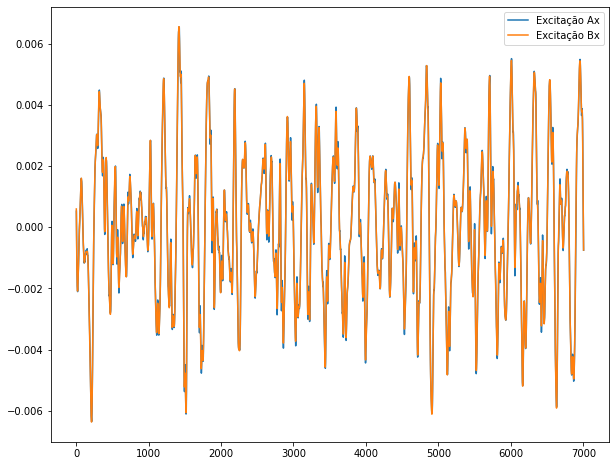

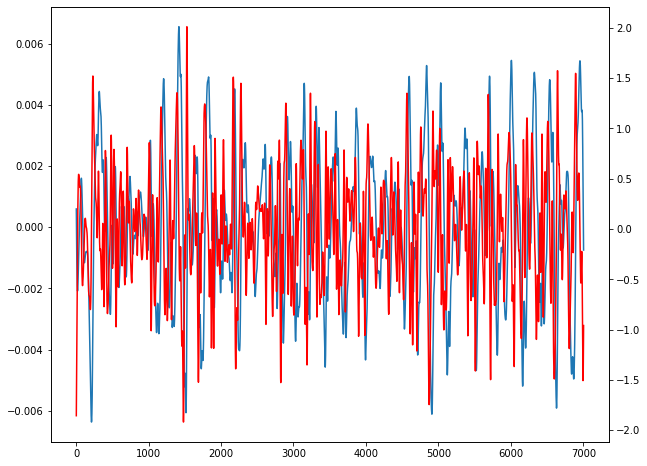

In [171]:
df = append_derivatives_to_dataframe(df, "ax", dt=0.000165, window_length=31, polyorder=3)

plt.figure(figsize=(10,8))
plt.plot((df["ax"] - df["ax"].shift()).iloc[i0:i1]/0.000165, label="Excitação Ax")
plt.plot(df["ax_dot"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()


fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
ax1.plot(df["ax_dot"].iloc[i0:i1])
ax2.plot(df["ax_dot2"].iloc[i0:i1], color="red")
fig.show()


Timedelta('0 days 00:00:00.000195')

In [166]:
df = dfs[0]

df["datetime"] - df["datetime"].shift()

4                          NaT
5       0 days 00:00:00.000196
6       0 days 00:00:00.000195
7       0 days 00:00:00.000195
8       0 days 00:00:00.000196
                 ...          
71691   0 days 00:00:00.000195
71692   0 days 00:00:00.000195
71693   0 days 00:00:00.000195
71694   0 days 00:00:00.000196
71695   0 days 00:00:00.000195
Name: datetime, Length: 71680, dtype: timedelta64[ns]